In [1]:
from active_planner import ActivePlanner

Using TensorFlow backend.


Failed to import pyassimp, see https://github.com/ros-planning/moveit/issues/86 for more info


In [2]:

from cv_bridge import CvBridge, CvBridgeError
from sklearn.gaussian_process import GaussianProcessRegressor 
from keras.applications.inception_v3 import InceptionV3
import tensorflow as tf
import sys
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages') # in order to import cv2 under python3
import cv2
sys.path.append('/opt/ros/kinetic/lib/python2.7/dist-packages') # append back in order to import rospy
import rospy 
import message_filters
import argparse
from add_pts import PlanningGraph
from sensor_msgs.msg import Image
import path_plan as pp 
from sensor_msgs.msg import JointState
import numpy as np
import moveit_commander
import random
import threading 
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display
from sklearn.gaussian_process.kernels import RBF
from keras.applications.inception_v3 import preprocess_input

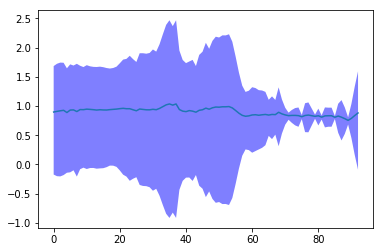

best view: (67, 0.0)
rewards: 0.7455005,0.80420727,0.81861323,0.81177455,0.8266916, array: [0.7455005, 0.80420727, 0.81861323, 0.81177455, 0.8266916]reward: 0.8266916
current (-0.803319279347555, -2.2003782431231897, 1.64829683303833, -2.929500404988424, -1.695853058491842, 0.05214710906147957), next None

rewards: []
trajectory: []
entering callback


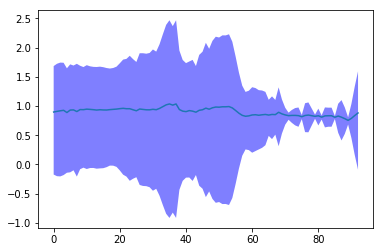

reward: 0.8266916
current (-0.803319279347555, -2.2003782431231897, 1.64829683303833, -2.929500404988424, -1.695853058491842, 0.05214710906147957), next None
entering callback
reward: 0.82839507
current (-1.4236128965960901, -2.3447302023517054, 1.629110336303711, -2.929512325917379, -1.6958888212787073, 0.05209917202591896), next None
entering callback
reward: 0.82839507
current (-1.4236128965960901, -2.3447302023517054, 1.629110336303711, -2.929512325917379, -1.6958888212787073, 0.05209917202591896), next None
entering callback
reward: 0.82839507
current (-1.4236128965960901, -2.3447302023517054, 1.629110336303711, -2.929512325917379, -1.6958888212787073, 0.05209917202591896), next None
entering callback
reward: 0.82530355
current (-1.4236128965960901, -2.3447182814227503, 1.6290740966796875, -2.929512325917379, -1.695853058491842, 0.05217107757925987), next None
entering callback
reward: 0.82530355
current (-1.4236128965960901, -2.3447182814227503, 1.6290740966796875, -2.92951232591

reward: 0.80051523
current (-1.423577133809225, -2.3447182814227503, 1.6290860176086426, -2.9295480887042444, -1.695841137562887, 0.05214710906147957), next None
entering callback
reward: 0.80051523
current (-1.423577133809225, -2.3447182814227503, 1.6290860176086426, -2.9295480887042444, -1.695841137562887, 0.05214710906147957), next None
entering callback
reward: 0.80051523
current (-1.423577133809225, -2.3447182814227503, 1.6290860176086426, -2.9295480887042444, -1.695841137562887, 0.05214710906147957), next None
entering callback
reward: 0.8207014
current (-1.4235652128802698, -2.3447302023517054, 1.6290860176086426, -2.9295242468463343, -1.6959131399737757, 0.05217107757925987), next None
entering callback
reward: 0.8207014
current (-1.4235652128802698, -2.3447302023517054, 1.6290860176086426, -2.9295242468463343, -1.6959131399737757, 0.05217107757925987), next None
entering callback
reward: 0.8207014
current (-1.4235652128802698, -2.3447302023517054, 1.6290860176086426, -2.929524

In [3]:
if __name__ == "__main__":

    parser = argparse.ArgumentParser()
    parser.add_argument("--vfile", default="test_graph_pts.npy", help="File path for saving vertices")
    parser.add_argument("--efile", default="test_graph_edges.npy", help="File path for saving edges")
    parser.add_argument("--robot_name", default="ur10", help="Name of robot")
    args, unknown_args = parser.parse_known_args()

    targets = ['liquid.jpg'] #, 'left0000.jpg']
    target_names = ['test_liquid'] #, 'torso']

    num_views = 5
    num_trials = 3

    for t, n in zip(targets, target_names):
        print("t, n: {}, {}".format(t, n))
        # send to initial position
        target_im = cv2.imread(t)
        #print(np.shape(np.array(target_im)))
        #print(target_im)
        cv2.imshow('target', target_im)
        ap = ActivePlanner(target_im, args.vfile, args.efile, args.robot_name, n, init_pose=None, visualize=True)

        for i in range(0, num_trials):
            print("trial: " + str(i))
            ap.run(num_views, cycle=False)
            ap.reset()

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages') # in order to import cv2 under python3
import cv2
sys.path.append('/opt/ros/kinetic/lib/python2.7/dist-packages') # append back in order to import rospy
import csv
#import pandas as pd


In [44]:
file_prefix = "data/liquid"

#rewards = pd.read_csv(file_prefix + "_rewards.csv", sep=',',header=None)
rewards = np.genfromtxt(file_prefix + "_rewards.csv", delimiter=',')
trajectories = np.genfromtxt(file_prefix + "_trajectory.csv", delimiter=',')
# with open(file_prefix + "_rewards.csv") as rewards_file:
#     rewards = csv.reader(rewards_file, delimiter=',')
# #rewards = np.loadtxt(file_prefix + "_rewards.csv")
# #trajectories = np.load(file_prefix + "_trajectory.csv", allow_pickle=True)
# #images = np.load(file_prefix + "_images.csv")
# #
num_trials, ep_length = np.shape(rewards)
#     for row in rewards:
#         print(len(row))
        


    
    #rewards
    
np.shape(my_data)

(7, 15)

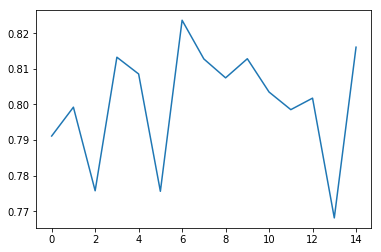

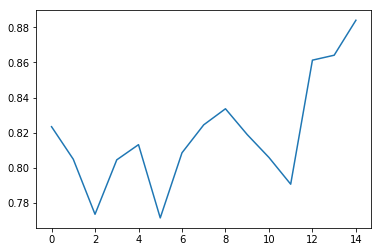

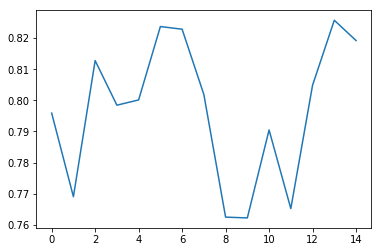

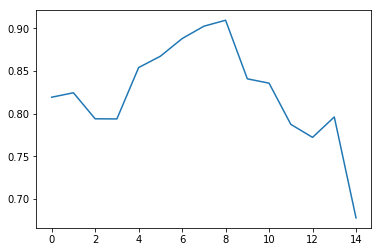

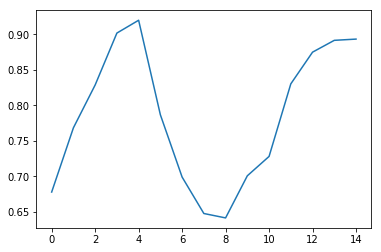

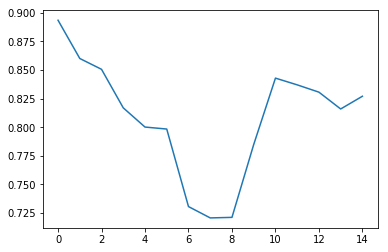

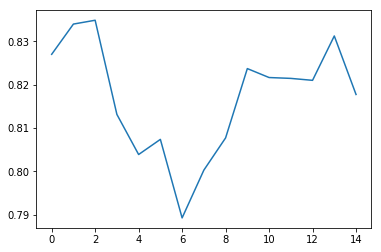

In [45]:
for i in range(num_trials):
    plt.figure()
    plt.plot(range(0, ep_length), rewards[i, :])

In [48]:
def visualizeTrajectory(trial):
    for i in range(ep_length):
        print(trial)
        plt.figure()
        im = cv2.imread(file_prefix + "_t{}_v{}.jpg".format(trial, i))
        plt.imshow(im, interpolation='nearest')

In [17]:
l = [0.8270144,0.83400214,0.8348881,0.8131292,0.8038642,0.8073597,0.78921443,0.8002539,0.80770147,0.8237166,0.8216519,0.8214534,0.8210035,0.83125556,0.81773686]

7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


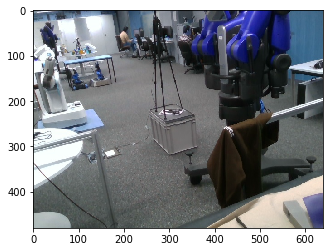

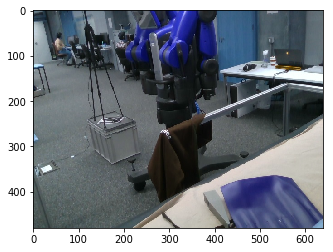

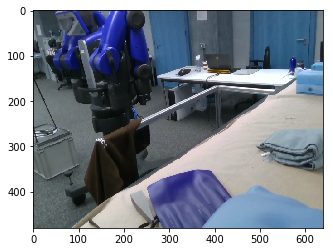

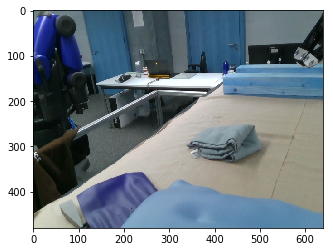

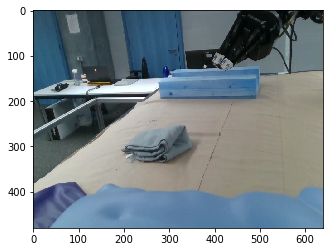

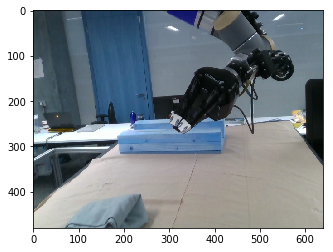

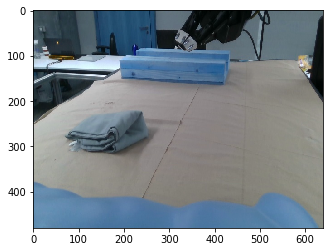

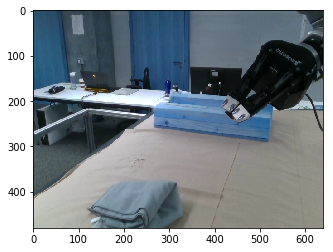

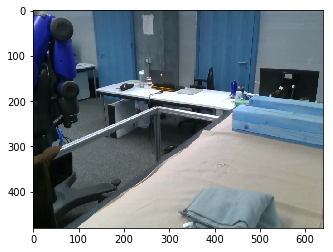

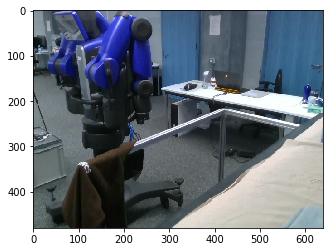

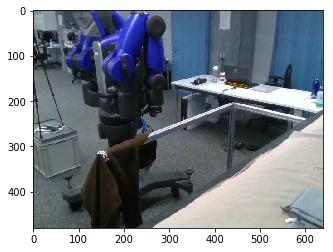

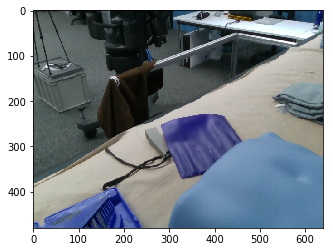

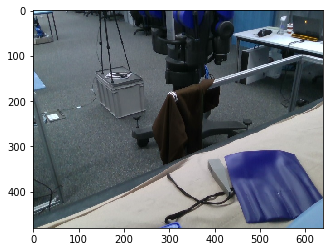

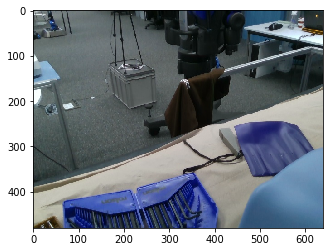

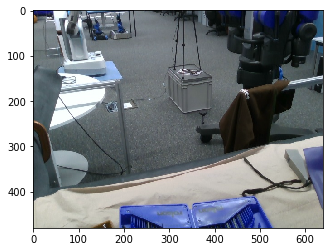

In [55]:
visualizeTrajectory(7)